<a href="https://colab.research.google.com/github/Aiengineer360/FIFA_EDA/blob/main/FootBall_Match_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**FIFA EDA**

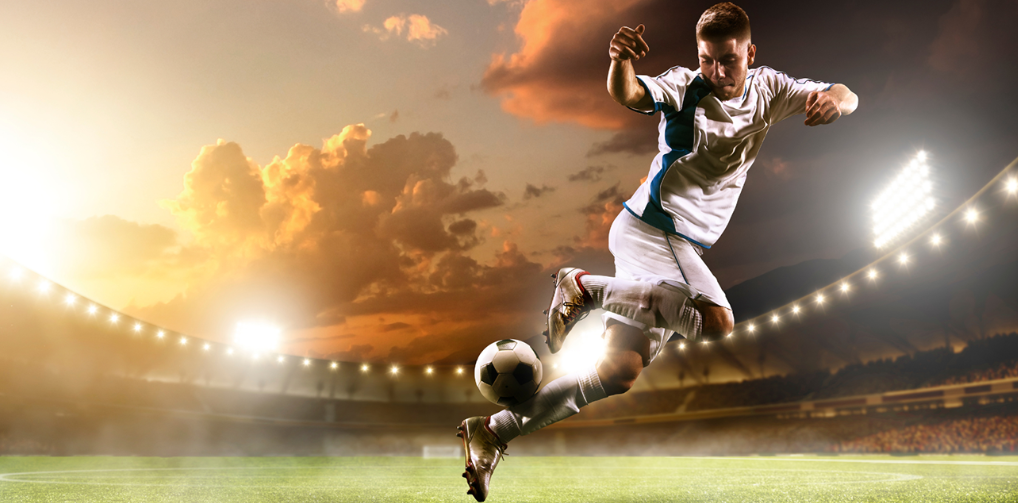

###Importing Libraries

In [1]:
import kagglehub
import sqlite3
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.impute import SimpleImputer

###Importing dataset and Converting to csv files

In [9]:
# Download latest version
dataset_path = kagglehub.dataset_download("hugomathien/soccer")

# Construct the database file path
database_file = os.path.join(dataset_path, "database.sqlite")

# Connect to the database
conn = sqlite3.connect(database_file)

# Read data from tables and save to CSV files
tables = ['Country', 'League', 'Match', 'Player', 'Player_Attributes', 'Team', 'Team_Attributes']

for table in tables:
    try:
        # Read data from the table
        df = pd.read_sql_query(f'SELECT * FROM {table}', conn)

        # Save data to a CSV file
        csv_file = f'{table}.csv'
        df.to_csv(csv_file, index=False)
        print(f"Data from table '{table}' saved to '{csv_file}'")
    except Exception as e:
        print(f"Error processing table '{table}': {e}")

# Close the database connection
conn.close()

Data from table 'Country' saved to 'Country.csv'
Data from table 'League' saved to 'League.csv'
Data from table 'Match' saved to 'Match.csv'
Data from table 'Player' saved to 'Player.csv'
Data from table 'Player_Attributes' saved to 'Player_Attributes.csv'
Data from table 'Team' saved to 'Team.csv'
Data from table 'Team_Attributes' saved to 'Team_Attributes.csv'


###Making Filtered Dataset

In [10]:
# List of relevant columns to extract
relevant_columns = [
    'country_id', 'league_id', 'season', 'stage', 'date', 'match_api_id',
    'home_team_api_id', 'away_team_api_id', 'home_team_goal', 'away_team_goal',
    'goal', 'shoton', 'shotoff', 'foulcommit', 'card', 'cross', 'corner', 'possession'
]

# List of CSV files to process
csv_files = ['Country.csv', 'League.csv', 'Match.csv', 'Player.csv', 'Player_Attributes.csv', 'Team.csv', 'Team_Attributes.csv']

# Initialize an empty DataFrame to store the filtered data
filtered_data = pd.DataFrame()

# Iterate through each CSV file
for csv_file in csv_files:
    try:
        # Read the CSV file into a DataFrame
        df = pd.read_csv(csv_file)

        # Check if any of the relevant columns exist in the current DataFrame
        existing_columns = [col for col in relevant_columns if col in df.columns]

        if existing_columns:
            # Extract only the relevant columns
            filtered_df = df[existing_columns]

            # Append the filtered data to the main DataFrame
            filtered_data = pd.concat([filtered_data, filtered_df], axis=0, ignore_index=True)
            print(f"Relevant columns extracted from '{csv_file}'")
        else:
            print(f"No relevant columns found in '{csv_file}'")
    except Exception as e:
        print(f"Error processing '{csv_file}': {e}")

# Remove rows where only 'country_id' and 'league_id' are present
additional_columns = [col for col in relevant_columns if col not in ['country_id', 'league_id']]
filtered_data = filtered_data.dropna(subset=additional_columns, how='all')

# Save the filtered data to a new CSV file
filtered_csv_file = 'filtered_data.csv'
filtered_data.to_csv(filtered_csv_file, index=False)
print(f"Filtered data saved to '{filtered_csv_file}'")

# Display the first few rows of the filtered data
print(filtered_data.head())

No relevant columns found in 'Country.csv'
Relevant columns extracted from 'League.csv'
Relevant columns extracted from 'Match.csv'
No relevant columns found in 'Player.csv'
Relevant columns extracted from 'Player_Attributes.csv'
No relevant columns found in 'Team.csv'
Relevant columns extracted from 'Team_Attributes.csv'
Filtered data saved to 'filtered_data.csv'
    country_id  league_id     season  stage                 date  \
11         1.0        1.0  2008/2009    1.0  2008-08-17 00:00:00   
12         1.0        1.0  2008/2009    1.0  2008-08-16 00:00:00   
13         1.0        1.0  2008/2009    1.0  2008-08-16 00:00:00   
14         1.0        1.0  2008/2009    1.0  2008-08-17 00:00:00   
15         1.0        1.0  2008/2009    1.0  2008-08-16 00:00:00   

    match_api_id  home_team_api_id  away_team_api_id  home_team_goal  \
11      492473.0            9987.0            9993.0             1.0   
12      492474.0           10000.0            9994.0             0.0   
13      

In [11]:
# Display the first few rows of the filtered data
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 211415 entries, 11 to 211425
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   country_id        25979 non-null   float64
 1   league_id         25979 non-null   float64
 2   season            25979 non-null   object 
 3   stage             25979 non-null   float64
 4   date              211415 non-null  object 
 5   match_api_id      25979 non-null   float64
 6   home_team_api_id  25979 non-null   float64
 7   away_team_api_id  25979 non-null   float64
 8   home_team_goal    25979 non-null   float64
 9   away_team_goal    25979 non-null   float64
 10  goal              14217 non-null   object 
 11  shoton            14217 non-null   object 
 12  shotoff           14217 non-null   object 
 13  foulcommit        14217 non-null   object 
 14  card              14217 non-null   object 
 15  cross             14217 non-null   object 
 16  corner            14217 

###Checking for Missing Values

In [12]:
df.isnull().sum()

,0
id,0
team_fifa_api_id,0
team_api_id,0
date,0
buildUpPlaySpeed,0
buildUpPlaySpeedClass,0
buildUpPlayDribbling,969
buildUpPlayDribblingClass,0
buildUpPlayPassing,0
buildUpPlayPassingClass,0


###Imputing Numerical and Categorical columns

In [13]:
relevant_columns = [
    'country_id', 'league_id', 'season', 'stage', 'date', 'match_api_id',
    'home_team_api_id', 'away_team_api_id', 'home_team_goal', 'away_team_goal',
    'goal', 'shoton', 'shotoff', 'foulcommit', 'card', 'cross', 'corner', 'possession'
]
# Load the filtered_data DataFrame instead of the last df from the loop
filtered_data = pd.read_csv('filtered_data.csv')  # Load the data from the filtered CSV

# Identify numerical and categorical columns
# Use filtered_data.columns to get the actual columns present in the DataFrame
numerical_cols = filtered_data.select_dtypes(include=np.number).columns.tolist()
categorical_cols = filtered_data.select_dtypes(exclude=np.number).columns.tolist()

# Impute numerical columns with mean
imputer_num = SimpleImputer(strategy='mean')
filtered_data[numerical_cols] = imputer_num.fit_transform(filtered_data[numerical_cols])

# Impute categorical columns with most frequent value (or another suitable strategy)
imputer_cat = SimpleImputer(strategy='most_frequent')
filtered_data[categorical_cols] = imputer_cat.fit_transform(filtered_data[categorical_cols])

print("success")

<ipython-input-13-89405996e684>:7: DtypeWarning: Columns (2,10,11,12,13,14,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  filtered_data = pd.read_csv('filtered_data.csv')  # Load the data from the filtered CSV


success


###Calculating Goal Difference and Match Outcomes

In [15]:
# Step 1: Calculate Goal Difference
filtered_data['goal_difference'] = filtered_data['home_team_goal'] - filtered_data['away_team_goal']

# Step 2: Define Match Outcome
filtered_data['match_result'] = filtered_data.apply(lambda row: 'Home Win' if row['home_team_goal'] > row['away_team_goal'] else
                              ('Away Win' if row['home_team_goal'] < row['away_team_goal'] else 'Draw'), axis=1)

# Display the first few rows to check the new columns
print("\nMatch DataFrame with Goal Difference and Match Result:")
filtered_data[['home_team_goal', 'away_team_goal', 'goal_difference', 'match_result']].head()


Match DataFrame with Goal Difference and Match Result:


,home_team_goal,away_team_goal,goal_difference,match_result
0,1.0,1.0,0.0,Draw
1,0.0,0.0,0.0,Draw
2,0.0,3.0,-3.0,Away Win
3,5.0,0.0,5.0,Home Win
4,1.0,3.0,-2.0,Away Win


###Preparation of Team Data

In [16]:
# Load the 'Team.csv' file into the 'team' DataFrame
team = pd.read_csv('Team.csv')

# Load the 'Team_Attributes.csv' file into the 'team_attributes' DataFrame
team_attributes = pd.read_csv('Team_Attributes.csv')

# Select relevant columns from team and team_attributes
team_df_selected = team[['team_api_id', 'team_long_name']].rename(columns={'team_long_name': 'team_name'})
team_attributes_df_selected = team_attributes[['team_api_id', 'date', 'buildUpPlaySpeed', 'buildUpPlayPassing',
                                                'chanceCreationPassing', 'chanceCreationCrossing',
                                                'chanceCreationShooting', 'defencePressure', 'defenceAggression',
                                                'defenceTeamWidth']]

# Ensure you're working with a copy of the DataFrame
team_attributes_df_selected = team_attributes_df_selected.copy()

# Convert the 'date' column to datetime using .loc to avoid the warning
team_attributes_df_selected.loc[:, 'date'] = pd.to_datetime(team_attributes_df_selected['date'])

# Select relevant columns from team and team_attributes
team_df_selected = team

# Merge team and team_attributes on team_api_id
team_data = team_df_selected.merge(team_attributes_df_selected, on='team_api_id', how='left')

# Display the merged dataframe to check
team_data.head()

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name,date,buildUpPlaySpeed,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth
0,1,9987,673.0,KRC Genk,GEN,2010-02-22 00:00:00,45.0,45.0,50.0,35.0,60.0,70.0,65.0,70.0
1,1,9987,673.0,KRC Genk,GEN,2011-02-22 00:00:00,66.0,52.0,65.0,66.0,51.0,48.0,47.0,54.0
2,1,9987,673.0,KRC Genk,GEN,2012-02-22 00:00:00,53.0,55.0,55.0,48.0,56.0,47.0,45.0,55.0
3,1,9987,673.0,KRC Genk,GEN,2013-09-20 00:00:00,58.0,38.0,67.0,48.0,56.0,47.0,45.0,55.0
4,1,9987,673.0,KRC Genk,GEN,2014-09-19 00:00:00,58.0,38.0,67.0,48.0,56.0,47.0,45.0,55.0


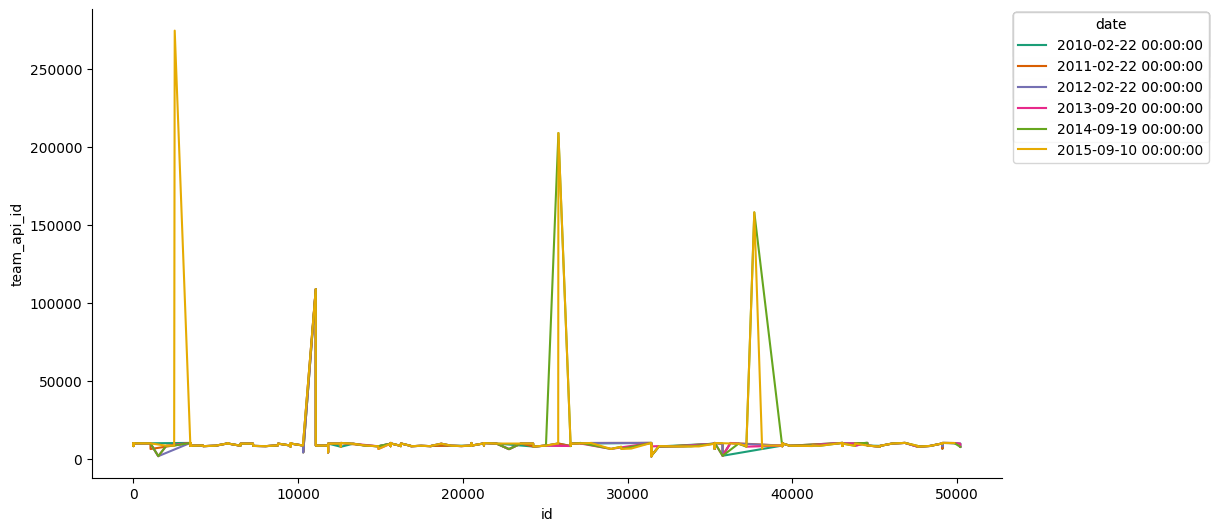

In [10]:
# @title id vs team_api_id

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['id']
  ys = series['team_api_id']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = team_data.sort_values('id', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('date')):
  _plot_series(series, series_name, i)
  fig.legend(title='date', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('id')
_ = plt.ylabel('team_api_id')

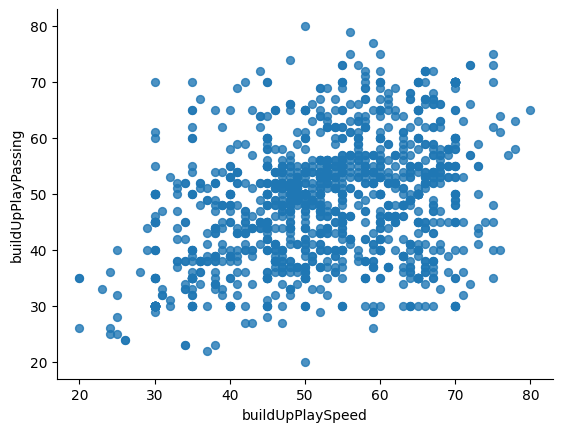

In [121]:
# @title buildUpPlaySpeed vs buildUpPlayPassing

from matplotlib import pyplot as plt
team_data.plot(kind='scatter', x='buildUpPlaySpeed', y='buildUpPlayPassing', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

###Preparation of Player Data

In [122]:
# Selecting important columns from player_attributes
# Load Player_Attributes.csv into player_attributes DataFrame first
player_attributes = pd.read_csv('Player_Attributes.csv')

player_data = player_attributes[['player_api_id', 'overall_rating', 'potential', 'preferred_foot',
                                 'attacking_work_rate', 'defensive_work_rate', 'crossing', 'finishing',
                                 'dribbling', 'ball_control', 'acceleration', 'sprint_speed',
                                 'stamina', 'positioning', 'marking',
                                 'standing_tackle', 'sliding_tackle']]

# Selecting height and weight from player
# Load Player.csv into player DataFrame
player = pd.read_csv('Player.csv')

player_info = player[['player_api_id', 'height', 'weight']]

# Merging height and weight with player attributes
player_data = player_data.merge(player_info, on='player_api_id', how='left')

# Checking the result
print(player_data.info())
player_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   player_api_id        183978 non-null  int64  
 1   overall_rating       183142 non-null  float64
 2   potential            183142 non-null  float64
 3   preferred_foot       183142 non-null  object 
 4   attacking_work_rate  177109 non-null  object 
 5   defensive_work_rate  183142 non-null  object 
 6   crossing             183142 non-null  float64
 7   finishing            183142 non-null  float64
 8   dribbling            183142 non-null  float64
 9   ball_control         183142 non-null  float64
 10  acceleration         183142 non-null  float64
 11  sprint_speed         183142 non-null  float64
 12  stamina              183142 non-null  float64
 13  positioning          183142 non-null  float64
 14  marking              183142 non-null  float64
 15  standing_tackle  

,player_api_id,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,dribbling,ball_control,acceleration,sprint_speed,stamina,positioning,marking,standing_tackle,sliding_tackle,height,weight
0,505942,67.0,71.0,right,medium,medium,49.0,44.0,51.0,49.0,60.0,64.0,54.0,45.0,65.0,69.0,69.0,182.88,187
1,505942,67.0,71.0,right,medium,medium,49.0,44.0,51.0,49.0,60.0,64.0,54.0,45.0,65.0,69.0,69.0,182.88,187
2,505942,62.0,66.0,right,medium,medium,49.0,44.0,51.0,49.0,60.0,64.0,54.0,45.0,65.0,66.0,69.0,182.88,187
3,505942,61.0,65.0,right,medium,medium,48.0,43.0,50.0,48.0,60.0,64.0,54.0,44.0,62.0,63.0,66.0,182.88,187
4,505942,61.0,65.0,right,medium,medium,48.0,43.0,50.0,48.0,60.0,64.0,54.0,44.0,62.0,63.0,66.0,182.88,187


###Histogram of Home Team vs Away Team

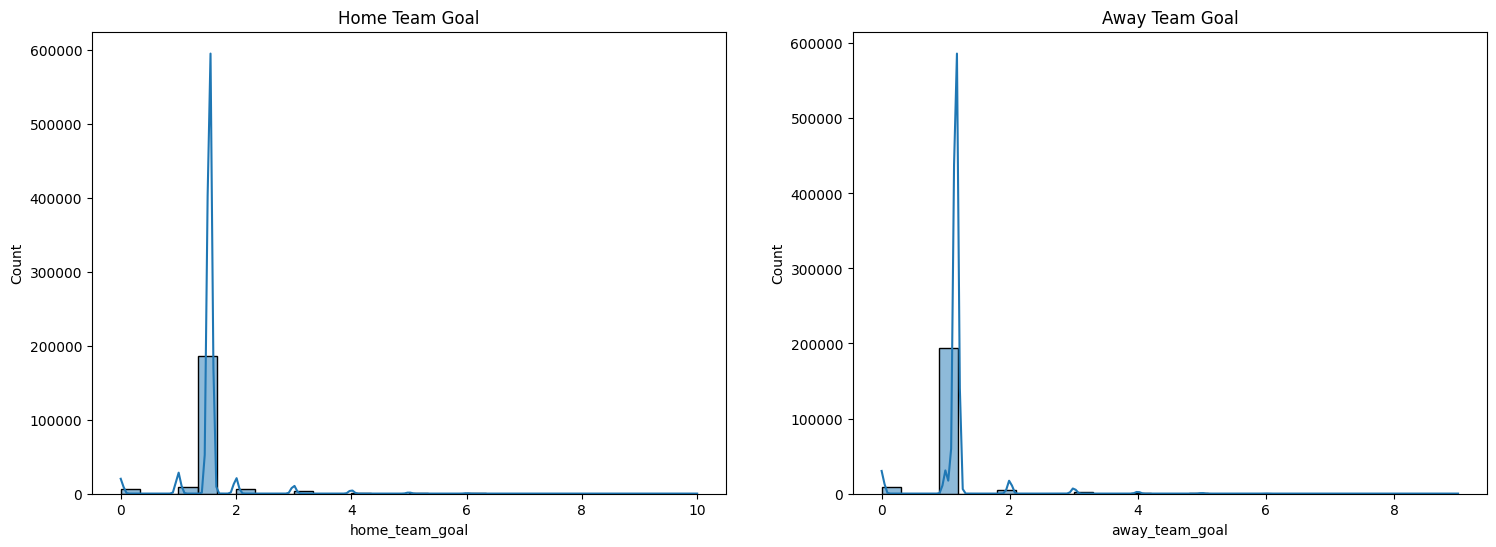

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6)) # Now plt refers to matplotlib.pyplot

sns.histplot(filtered_data['home_team_goal'], bins=30, kde=True, ax=axes[0])
axes[0].set_title('Home Team Goal')
sns.histplot(filtered_data["away_team_goal"], bins=30, kde=True, ax=axes[1])
axes[1].set_title('Away Team Goal')
plt.show()

###Boxplot of Overall Rating and Ball Control

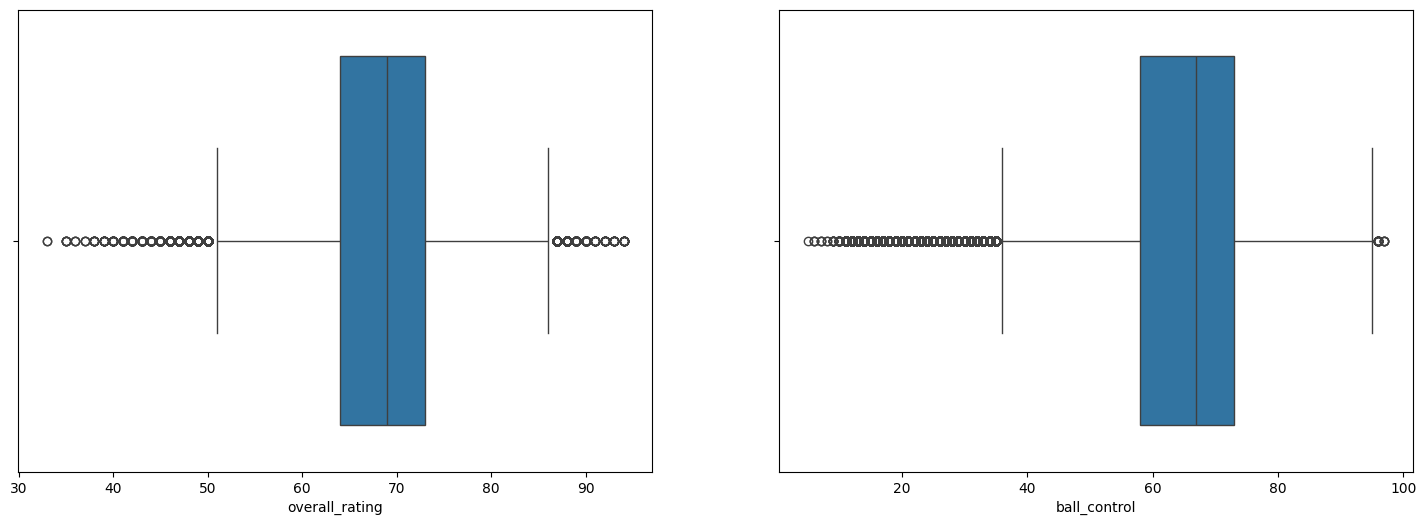

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Assuming 'overall_rating' and 'ball_control' are in 'Player_Attributes.csv'
# Load the specific CSV file containing these columns
player_attributes_df = pd.read_csv('Player_Attributes.csv')

# Use the loaded DataFrame to access the columns
sns.boxplot(x=player_attributes_df['overall_rating'], ax=axes[0])
sns.boxplot(x=player_attributes_df['ball_control'], ax=axes[1])

plt.show()

###Stamina vs Sprint Speed

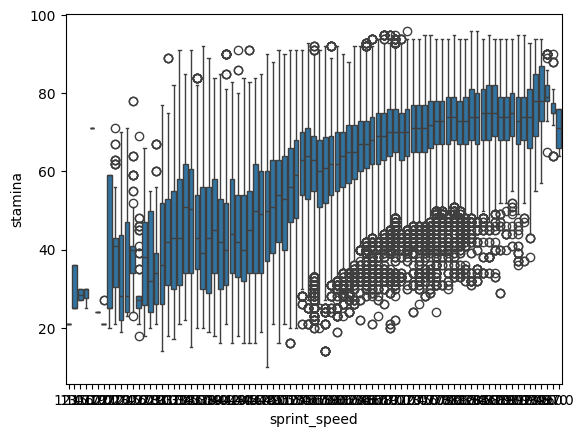

In [15]:
player_attributes_df = pd.read_csv('Player_Attributes.csv')

# Create the box plot using the correct DataFrame
sns.boxplot(x=player_attributes_df['sprint_speed'], y=player_attributes_df['stamina'])
plt.show()

###Optimizing Datatypes

In [19]:
# Function to optimize data types
def optimize_data_types(df):
    df = df.copy()  # Avoid modifying the original DataFrame
    for col in df.select_dtypes(include=['float64']).columns:
        df[col] = df[col].astype('float32')  # Explicitly downcast to float32
    for col in df.select_dtypes(include=['int64']).columns:
        df[col] = df[col].astype('int32')  # Explicitly downcast to int32
    return df

# Load the Country and League DataFrames
country = pd.read_csv('Country.csv') # Load data from Country.csv
league = pd.read_csv('League.csv') # Load data from League.csv

# Now apply the optimization function
filtered_data = optimize_data_types(filtered_data)
country = optimize_data_types(country)
league = optimize_data_types(league)
team = optimize_data_types(team)
player = optimize_data_types(player)
player_data = optimize_data_types(player_data)
team_data = optimize_data_types(team_data)

In [20]:
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211415 entries, 0 to 211414
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   country_id        211415 non-null  float32
 1   league_id         211415 non-null  float32
 2   season            211415 non-null  object 
 3   stage             211415 non-null  float32
 4   date              211415 non-null  object 
 5   match_api_id      211415 non-null  float32
 6   home_team_api_id  211415 non-null  float32
 7   away_team_api_id  211415 non-null  float32
 8   home_team_goal    211415 non-null  float32
 9   away_team_goal    211415 non-null  float32
 10  goal              211415 non-null  object 
 11  shoton            211415 non-null  object 
 12  shotoff           211415 non-null  object 
 13  foulcommit        211415 non-null  object 
 14  card              211415 non-null  object 
 15  cross             211415 non-null  object 
 16  corner            21

###Displaying Null Values

In [21]:
# Function to display null values and rows to be dropped
def display_null_info(df, df_name):
    print(f"Null values in {df_name}:")
    print(df.isnull().sum())
    print(f"\nTotal rows in {df_name}: {len(df)}")
    print(f"Rows with any null values in {df_name}: {df.isnull().any(axis=1).sum()}\n")

# Display null info for each dataframe
display_null_info(filtered_data, 'filtered_data')
display_null_info(country, 'country')
display_null_info(league, 'league')
display_null_info(player_data, 'player_data')
display_null_info(team, 'team')

Null values in filtered_data:
country_id          0
league_id           0
season              0
stage               0
date                0
match_api_id        0
home_team_api_id    0
away_team_api_id    0
home_team_goal      0
away_team_goal      0
goal                0
shoton              0
shotoff             0
foulcommit          0
card                0
cross               0
corner              0
possession          0
goal_difference     0
match_result        0
dtype: int64

Total rows in filtered_data: 211415
Rows with any null values in filtered_data: 0

Null values in country:
id      0
name    0
dtype: int64

Total rows in country: 11
Rows with any null values in country: 0

Null values in league:
id            0
country_id    0
name          0
dtype: int64

Total rows in league: 11
Rows with any null values in league: 0

Null values in player_data:
player_api_id             0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rat

###Merging Dataframes

In [22]:
# Load the 'Team.csv' file into the 'team' DataFrame
team = pd.read_csv('Team.csv')

# Load the 'Team_Attributes.csv' file into the 'team_attributes' DataFrame
team_attributes = pd.read_csv('Team_Attributes.csv')

# Select relevant columns from team and team_attributes
team_df_selected = team[['team_api_id', 'team_long_name']].rename(columns={'team_long_name': 'team_name'})
team_attributes_df_selected = team_attributes[['team_api_id', 'date', 'buildUpPlaySpeed', 'buildUpPlayPassing',
                                                'chanceCreationPassing', 'chanceCreationCrossing',
                                                'chanceCreationShooting', 'defencePressure', 'defenceAggression',
                                                'defenceTeamWidth']]

# Ensure you're working with a copy of the DataFrame
team_attributes_df_selected = team_attributes_df_selected.copy()

# Convert the 'date' column to datetime using .loc to avoid the warning
team_attributes_df_selected.loc[:, 'date'] = pd.to_datetime(team_attributes_df_selected['date'])

# Select relevant columns from team and team_attributes
team_df_selected = team

# Merge team and team_attributes on team_api_id
team_data = team_df_selected.merge(team_attributes_df_selected, on='team_api_id', how='left')

# Display the merged dataframe to check
team_data.head()

# Load the Country DataFrame
country = pd.read_csv('Country.csv')
country_df_selected = country[['id']].rename(columns={'id': 'country_id'})

# Merge processed_df with country_df_selected
merged_df1 = filtered_data.merge(country_df_selected, on='country_id', how='left')

# Merge Home Team Names
merged_df2 = merged_df1.merge(team_df_selected, left_on='home_team_api_id', right_on='team_api_id', how='left') \
                        .rename(columns={'team_name': 'home_team_name'}) \
                        .drop(columns=['team_api_id'])

# Merge Home Team Attributes
merged_df3 = merged_df2.merge(team_df_selected, left_on='away_team_api_id', right_on='team_api_id', how='left') \
                        .rename(columns={'team_name': 'away_team_name'}) \
                        .drop(columns=['team_api_id'])

#The following line has been fixed by removing the extra indent and changing 'team_attribute_date' to 'date'
merged_df4 = merged_df3.merge(team_attributes_df_selected,
                               left_on=['home_team_api_id', 'date'],
                               right_on=['team_api_id', 'date'],  # Change 'team_attribute_date' to 'date'
                               how='left') \
                        .rename(columns={'date_y': 'home_team_attribute_date'}) \
                        .drop(columns=['team_api_id']) #rename the suffixed date column

# Merge Away Team Attributes
merged_df5 = merged_df4.merge(team_attributes_df_selected,
                       left_on=['away_team_api_id', 'date'],
                       right_on=['team_api_id', 'date'],  # Change 'team_attribute_date' to 'date'
                       how='left') \
               .rename(columns={'date_y': 'away_team_attribute_date'}) \
               .drop(columns=['team_api_id']) #rename the suffixed date column


# Merge with league_df_selected
league_df_selected = league[['id', 'name']].rename(columns={'id': 'country_id', 'name': 'league_name'})  # Assuming league CSV has an 'id' column matching country_id
df = merged_df5.merge(league_df_selected, left_on='country_id', right_on='country_id', how='left') \
                        .rename(columns={'league_name': 'tournament_type'}) \
                        .drop(columns=['country_id'])  # Drop country_id instead of league_id

<ipython-input-22-8faf8c2606e9>:36: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df1 = filtered_data.merge(country_df_selected, on='country_id', how='left')
<ipython-input-22-8faf8c2606e9>:39: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df2 = merged_df1.merge(team_df_selected, left_on='home_team_api_id', right_on='team_api_id', how='left') \
<ipython-input-22-8faf8c2606e9>:44: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df3 = merged_df2.merge(team_df_selected, left_on='away_team_api_id', right_on='team_api_id', how='left') \
<ipython-input-22-8faf8c2606e9>:49: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df4 = merged_df3.merge(team_attributes_df_selected

##Factors Influencing Match Outcomes

###Goal Difference and Match Results

In [23]:
# Step 1: Calculate Goal Difference
filtered_data['goal_difference'] = filtered_data['home_team_goal'] - filtered_data['away_team_goal']

# Step 2: Define Match Outcome
filtered_data['match_result'] = filtered_data.apply(lambda row: 'Home Win' if row['home_team_goal'] > row['away_team_goal'] else
                              ('Away Win' if row['home_team_goal'] < row['away_team_goal'] else 'Draw'), axis=1)

# Display the first few rows to check the new columns
print("\nMatch DataFrame with Goal Difference and Match Result:")
filtered_data[['home_team_goal', 'away_team_goal', 'goal_difference', 'match_result']].head()


Match DataFrame with Goal Difference and Match Result:


,home_team_goal,away_team_goal,goal_difference,match_result
0,1.0,1.0,0.0,Draw
1,0.0,0.0,0.0,Draw
2,0.0,3.0,-3.0,Away Win
3,5.0,0.0,5.0,Home Win
4,1.0,3.0,-2.0,Away Win


###Correlations between Features and Match Results

In [24]:
df = pd.read_csv('preprocessed_df.csv')
# Correlation between features and match outcomes (Win, Loss, Draw)
df_numeric = df.select_dtypes(include=['number'])
correlation = df_numeric.corr()
print(correlation[['score']])  # Assuming 'win' is a target column for match outcomes

                   score
height         -0.068440
weight         -0.025690
away_team_goal  0.045145
home_team_goal  0.062373
potential       0.421273
crossing        0.503286
finishing       0.372298
short_passing   0.612184
dribbling       0.584319
ball_control    0.656628
acceleration    0.280212
sprint_speed    0.267707
stamina         0.534877
score           1.000000


###HeatMap


Match DataFrame with Goal Difference and Match Result:


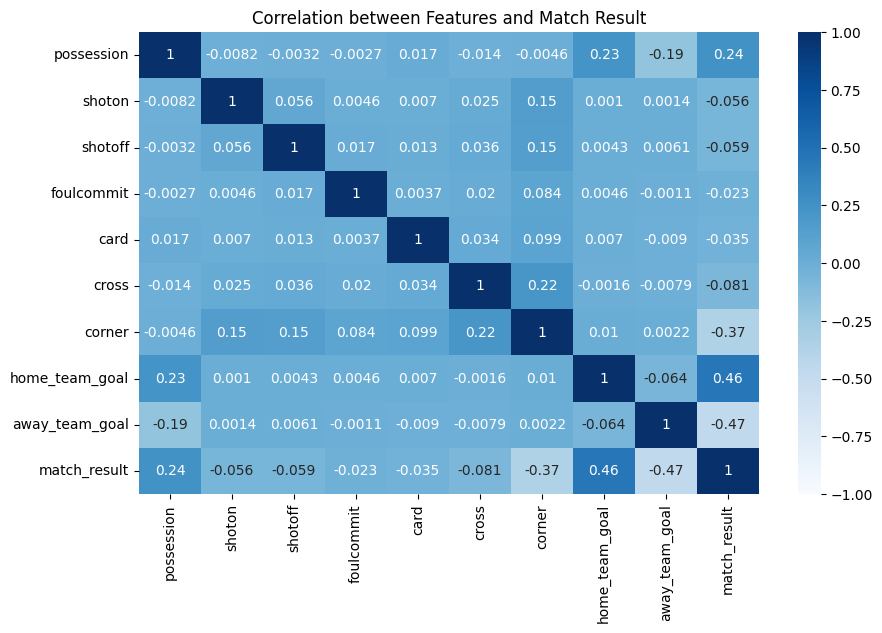

In [25]:
# Step 1: Calculate Goal Difference
filtered_data['goal_difference'] = filtered_data['home_team_goal'] - filtered_data['away_team_goal']

# Step 2: Define Match Outcome
filtered_data['match_result'] = filtered_data.apply(lambda row: 'Home Win' if row['home_team_goal'] > row['away_team_goal'] else
                              ('Away Win' if row['home_team_goal'] < row['away_team_goal'] else 'Draw'), axis=1)

# Display the first few rows to check the new columns
print("\nMatch DataFrame with Goal Difference and Match Result:")
filtered_data[['home_team_goal', 'away_team_goal', 'goal_difference', 'match_result']].head()

# Step 3: Select Relevant Features
features = ['possession', 'shoton', 'shotoff', 'foulcommit', 'card', 'cross', 'corner', 'home_team_goal', 'away_team_goal']

#Instead of using df, use filtered_data as it contains the 'match_result' column
df_selected = filtered_data[features + ['match_result']].copy()  # Use .copy() to avoid the warning

import re # import the regex module
def extract_possession(possession_string):
    try:
        # Find the home possession value using a regular expression
        match = re.search(r'<homepos>(\d+)</homepos>', possession_string)
        if match:
            return int(match.group(1))
        else:
            return np.nan  # Return NaN if no match is found
    except (TypeError, AttributeError):
        return np.nan  # Return NaN if the input is not a string or doesn't have the expected format

df_selected['possession'] = df_selected['possession'].apply(extract_possession)

# Updated mapping
match_result_mapping = {'Home Win': 1, 'Draw': 0, 'Away Win': -1}
df_selected.loc[:, 'match_result'] = df_selected['match_result'].map(match_result_mapping)

def extract_numerical_value(xml_string):
    try:
        # Use regex to find numerical value
        match = re.search(r'>(\d+)</', xml_string)
        if match:
            return int(match.group(1))
        else:
            return 0 # Assume 0 if no numerical value is found
    except (TypeError, AttributeError):
        return 0 # Return 0 for non-string or invalid input

# Apply the function to 'shoton', 'shotoff', 'foulcommit', 'card', 'cross', 'corner' columns
for col in ['shoton', 'shotoff', 'foulcommit', 'card', 'cross', 'corner']:
    df_selected[col] = df_selected[col].apply(extract_numerical_value)

# Step 4: Check Correlations between Features and Match Result
correlation_matrix = df_selected.corr()

# Step 5: Visualize Correlation with Match Result (Including Goal Difference)
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="Blues", vmin=-1, vmax=1)
plt.title("Correlation between Features and Match Result")
# Save the heatmap
plt.savefig('correlation_heatmap.png', bbox_inches='tight')
plt.show()

##Seasonal Trends

###Goals vs HomeTeam (Monthly Trend)

Total Goals by Month:
month
1      40.0
2     207.0
3      59.0
4      60.0
5      44.0
6       9.0
7       3.0
8     128.0
9     129.0
10     58.0
11     35.0
12     63.0
Name: total_goals, dtype: float64

Home Team Win Rate by Month:
month
1     0.437500
2     0.541667
3     0.384615
4     0.280000
5     0.428571
6     0.666667
7     1.000000
8     0.540000
9     0.595238
10    0.687500
11    0.133333
12    0.526316
Name: home_team_win, dtype: float64


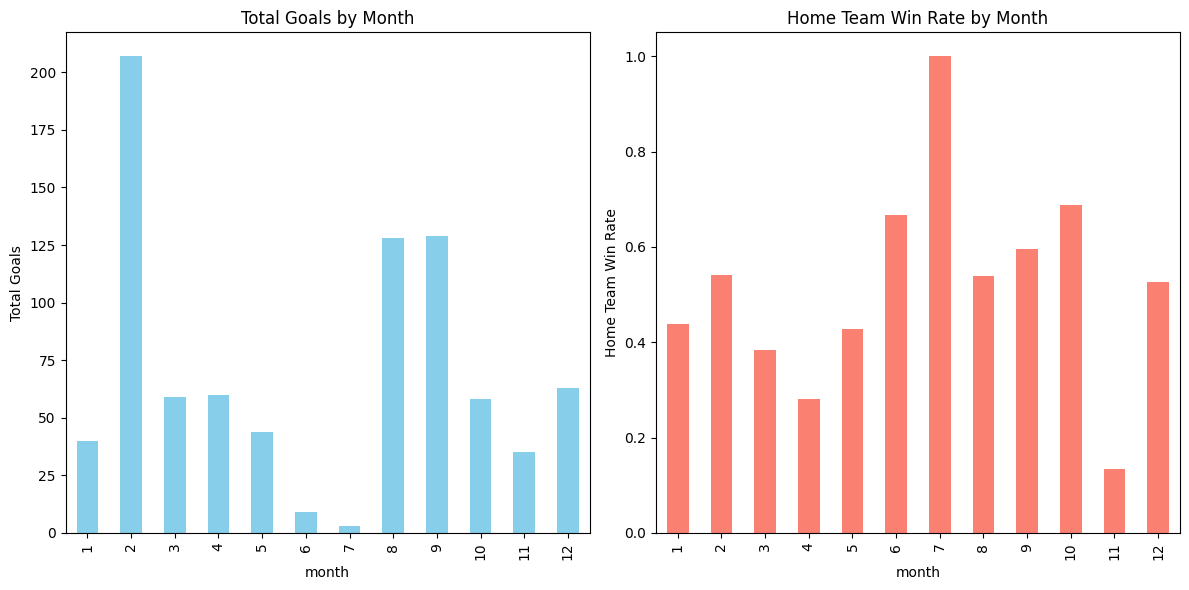

In [26]:
# Extract month and year from the date column
df['date'] = pd.to_datetime(df['date']) # Convert 'date' column to datetime
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

# Calculate total goals for each month
df['total_goals'] = df['home_team_goal'] + df['away_team_goal']
monthly_goals = df.groupby('month')['total_goals'].sum()

# Calculate home-team wins
df['home_team_win'] = df['home_team_goal'] > df['away_team_goal']
monthly_home_wins = df.groupby('month')['home_team_win'].mean()

# Print total goals by month
print("Total Goals by Month:")
print(monthly_goals)

# Print home team win rate by month
print("\nHome Team Win Rate by Month:")
print(monthly_home_wins)

# Plot monthly goals and home-team wins
plt.figure(figsize=(12, 6))

# Subplot for goals
plt.subplot(1, 2, 1)
monthly_goals.plot(kind='bar', color='skyblue', title="Total Goals by Month")
plt.ylabel('Total Goals')

# Subplot for home team wins
plt.subplot(1, 2, 2)
monthly_home_wins.plot(kind='bar', color='salmon', title="Home Team Win Rate by Month")
plt.ylabel('Home Team Win Rate')

plt.tight_layout()
# Save the figure
plt.savefig('monthly_goals_and_home_wins.png', bbox_inches='tight')

plt.show()

###Season vs Home Team

<ipython-input-27-f62849a055d6>:6: DtypeWarning: Columns (2,10,11,12,13,14,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  filtered_data = pd.read_csv('filtered_data.csv')  # Or any other file containing 'season'



Total Goals by Season:
season
2008/2009    835.0
Name: total_goals, dtype: float64

Home Team Win Rate by Season:
season
2008/2009    0.491639
Name: home_team_win, dtype: float64


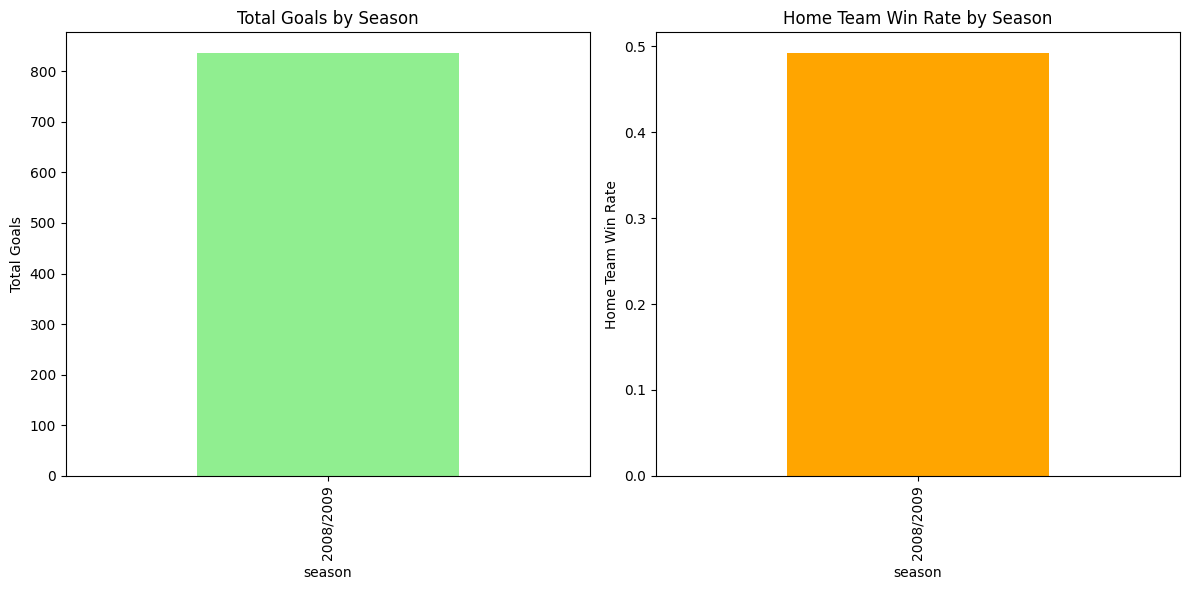

In [27]:
# Calculate total goals and home-team win rate by season
# Assuming 'df' was created from 'team_data' previously
# and you want to analyze seasonal trends

# Instead of reloading filtered_data, use the original one or merge it with df earlier
filtered_data = pd.read_csv('filtered_data.csv')  # Or any other file containing 'season'

# Assuming 'df' was created from 'team_data' which already has 'team_api_id',
# and 'filtered_data' has 'season' and 'match_api_id' (common to both)
# Merge or join your data to include 'season' in 'df'

# First, make sure 'df' has the relevant columns for merging
# If 'df' was created from 'team_data', add 'match_api_id' if it's not already there
if 'match_api_id' not in df.columns:
    # Merge 'df' with filtered_data to get 'match_api_id' based on index
    df = pd.merge(df, filtered_data[['match_api_id']], left_index=True, right_index=True, how='left')
    # Then, you can proceed with the merge with team_data using 'team_api_id' if needed
    # df = pd.merge(df, team_data[['team_api_id', 'match_api_id']], on='team_api_id', how='left')

# Now, merge with filtered_data to add 'season' using 'match_api_id'
df = pd.merge(df, filtered_data[['match_api_id', 'season']], on='match_api_id', how='left')

# Recalculate total goals after adding season to df
df['total_goals'] = df['home_team_goal'] + df['away_team_goal']
seasonal_goals = df.groupby('season')['total_goals'].sum()
seasonal_home_wins = df.groupby('season')['home_team_win'].mean()

# Print total goals by season
print("\nTotal Goals by Season:")
print(seasonal_goals)

# Print home team win rate by season
print("\nHome Team Win Rate by Season:")
print(seasonal_home_wins)

# Plot seasonal goals and home-team wins
plt.figure(figsize=(12, 6))

# Subplot for goals
plt.subplot(1, 2, 1)
seasonal_goals.plot(kind='bar', color='lightgreen', title="Total Goals by Season")
plt.ylabel('Total Goals')

# Subplot for home team wins
plt.subplot(1, 2, 2)
seasonal_home_wins.plot(kind='bar', color='orange', title="Home Team Win Rate by Season")
plt.ylabel('Home Team Win Rate')

plt.tight_layout()
# Save the figure
plt.savefig('Home Team Win Rate.png', bbox_inches='tight')
plt.show()

###Goals vs Home Team

Total Goals by Tournament Type:
tournament_type
Belgium Jupiler League    835.0
Name: total_goals, dtype: float64

Home Team Win Rate by Tournament Type:
tournament_type
Belgium Jupiler League    0.491639
Name: home_team_win, dtype: float64


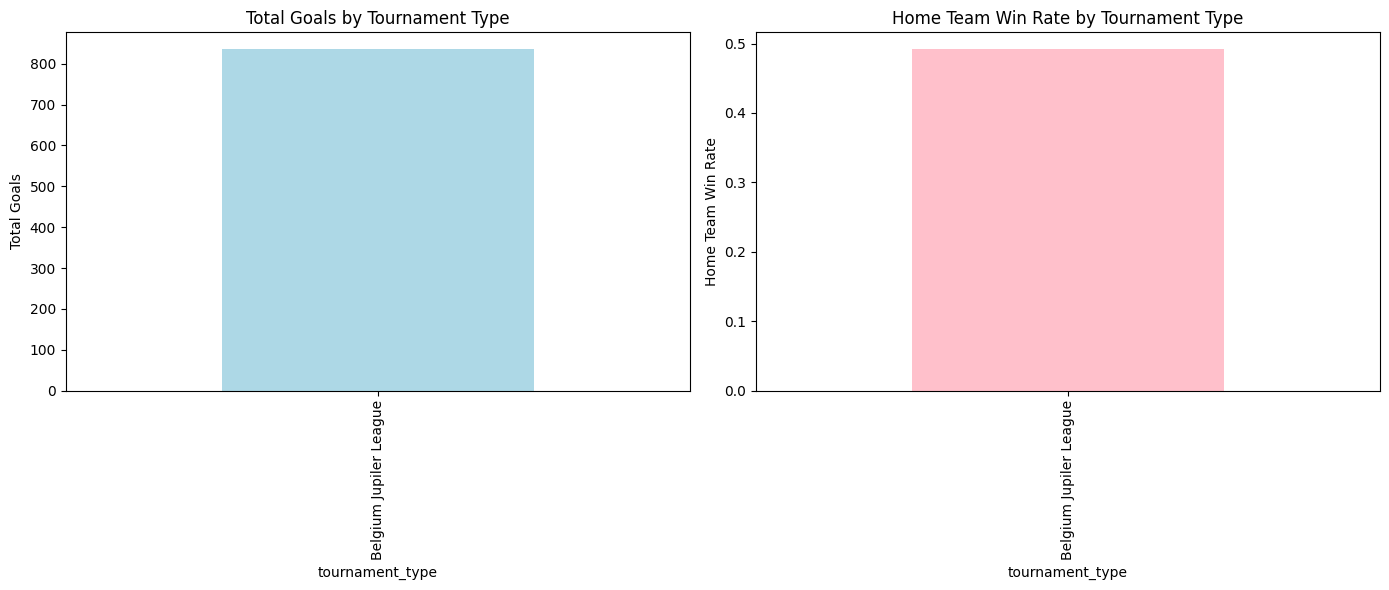

In [28]:
# Ensure 'tournament_type' is in df
if 'tournament_type' not in df.columns:
    # If df doesn't have tournament_type, try merging with league data instead
    league_data = pd.read_csv('League.csv')
    # Ensure league_id is in the df DataFrame before merging
    if 'league_id' not in df.columns:
        # If it's not there, try merging it from filtered_data
        df = pd.merge(df, filtered_data[['match_api_id', 'league_id']], on='match_api_id', how='left')
    df = pd.merge(df, league_data[['id', 'name']], left_on='league_id', right_on='id', how='left')
    df = df.rename(columns={'name': 'tournament_type'})  # Rename 'name' to 'tournament_type'
    df = df.drop(columns=['id'])  # Drop the extra 'id' column from league data

tournament_goals = df.groupby('tournament_type')['total_goals'].sum()
tournament_home_wins = df.groupby('tournament_type')['home_team_win'].mean()

# Print total goals by tournament type
print("Total Goals by Tournament Type:")
print(tournament_goals)

# Print home team win rate by tournament type
print("\nHome Team Win Rate by Tournament Type:")
print(tournament_home_wins)


# Plot the impact of tournament type on match outcomes

# Set up subplots
plt.figure(figsize=(14, 6))


# Subplot for total goals by tournament type
plt.subplot(1, 2, 1)
tournament_goals.plot(kind='bar', color='lightblue', title="Total Goals by Tournament Type")
plt.ylabel('Total Goals')

# Subplot for home team win rate by tournament type
plt.subplot(1, 2, 2)
tournament_home_wins.plot(kind='bar', color='pink', title="Home Team Win Rate by Tournament Type")
plt.ylabel('Home Team Win Rate')

# Tight layout to avoid overlapping
plt.tight_layout()

# Save the figure
plt.savefig('Home Team Win Rate by Tournament Type.png', bbox_inches='tight')
plt.show()

##Teams or Players consistently outperform others in terms of goals scored, assists, or defensive metrics

In [29]:
# Aggregate home team stats (goals, matches, wins)
df = pd.read_csv('filtered_data.csv')  # Load the preprocessed data

home_team_stats = df.groupby('home_team_api_id').agg(
    total_goals=('home_team_goal', 'sum'),
    total_matches=('home_team_api_id', 'count'),
    total_wins=('home_team_goal', lambda x: (x > df.loc[x.index, 'away_team_goal']).sum())
).reset_index().rename(columns={'home_team_api_id': 'team_api_id'})

# Aggregate away team stats (goals, matches, wins)
away_team_stats = df.groupby('away_team_api_id').agg(
    total_goals=('away_team_goal', 'sum'),
    total_matches=('away_team_api_id', 'count'),
    total_wins=('away_team_goal', lambda x: (x > df.loc[x.index, 'home_team_goal']).sum())
).reset_index().rename(columns={'away_team_api_id': 'team_api_id'})

# Combine the home and away stats into one dataframe
team_stats = pd.concat([home_team_stats, away_team_stats], ignore_index=True)

# Aggregate by team_api_id to sum goals, matches, and wins for the team regardless of home/away
team_stats = team_stats.groupby('team_api_id').agg(
    total_goals=('total_goals', 'sum'),
    total_matches=('total_matches', 'sum'),
    total_wins=('total_wins', 'sum')
).reset_index()

# Calculate win rate (total wins divided by total matches)
team_stats['win_rate'] = team_stats['total_wins'] / team_stats['total_matches']

# Check the number of unique team_api_ids to verify the data
print(f"Number of unique teams: {team_stats['team_api_id'].nunique()}")  # Should print 299

# Check the final output
team_stats.head()

<ipython-input-29-2b57e03b0e63>:3: DtypeWarning: Columns (2,10,11,12,13,14,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('filtered_data.csv')  # Load the preprocessed data


Number of unique teams: 299


,team_api_id,total_goals,total_matches,total_wins,win_rate
0,1601.0,280.0,240,92,0.383333
1,1773.0,126.0,90,22,0.244444
2,1957.0,287.0,240,87,0.362500
3,2033.0,138.0,150,32,0.213333
4,2182.0,372.0,240,124,0.516667


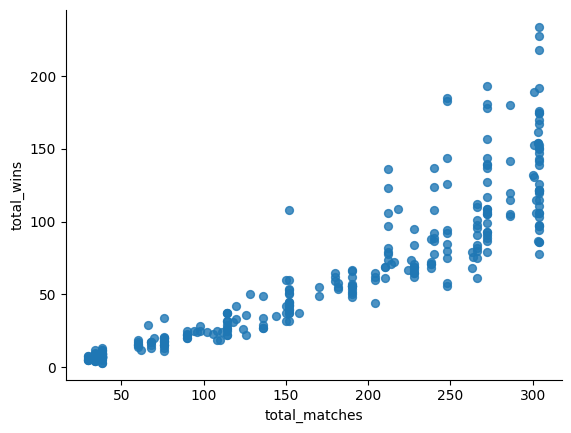

In [33]:
# @title total_matches vs total_wins

from matplotlib import pyplot as plt
team_stats.plot(kind='scatter', x='total_matches', y='total_wins', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

###Team api_id vs Total Matches

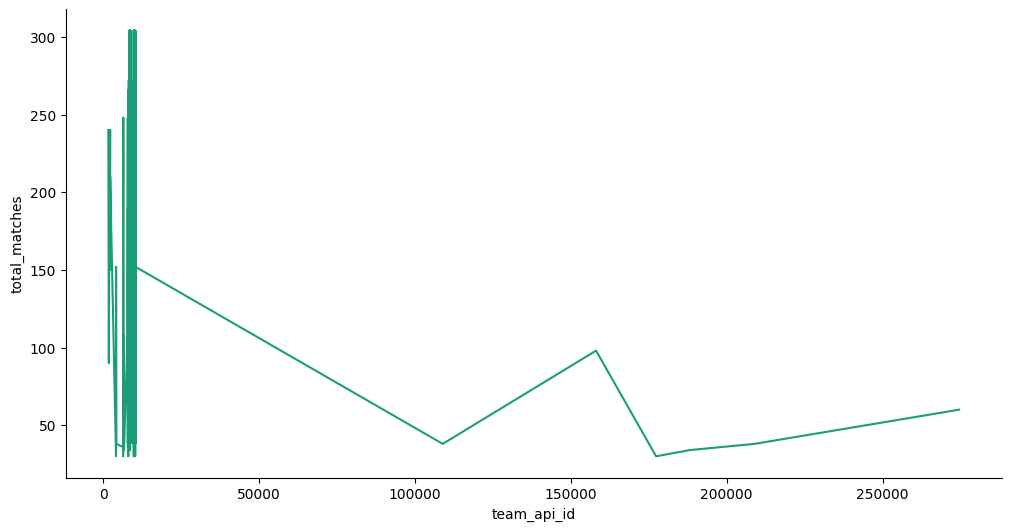

In [123]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['team_api_id']
  ys = series['total_matches']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = team_stats.sort_values('team_api_id', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('team_api_id')
_ = plt.ylabel('total_matches')

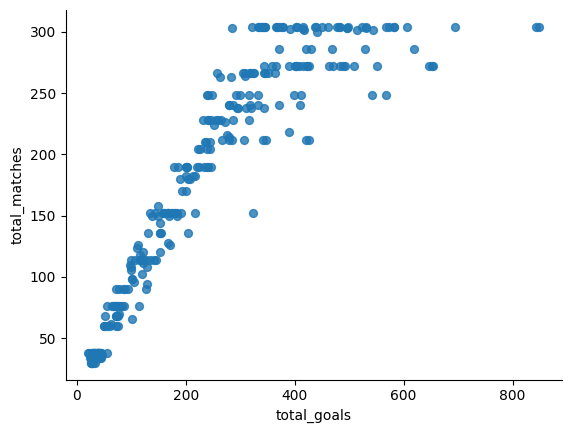

In [34]:
# @title total_goals vs total_matches

from matplotlib import pyplot as plt
team_stats.plot(kind='scatter', x='total_goals', y='total_matches', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

###Top 10 Teams by Defence pressure, aggression, team width

                   defencePressure
team_name                         
Odra Wodzisław           70.000000
KSV Roeselare            65.000000
FC Barcelona             64.333333
Wisła Kraków             61.666667
KSV Cercle Brugge        60.166667
Falkirk                  60.000000
Ajax                     59.833333
RSC Anderlecht           59.666667
Borussia Dortmund        59.333333
Cracovia                 59.000000
                          defenceTeamWidth
team_name                                 
KSV Roeselare                    70.000000
Falkirk                          70.000000
US Boulogne Cote D'Opale         67.000000
FC Barcelona                     66.500000
CA Osasuna                       65.833333
Granada CF                       65.800000
Odra Wodzisław                   65.000000
KSV Cercle Brugge                64.666667
SV Werder Bremen                 64.166667
RSC Anderlecht                   63.833333
                         defenceAggression
team_name            

<ipython-input-124-026629a3c6d2>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_teams_by_defencePressure.index, y=top_teams_by_defencePressure['defencePressure'], ax=ax[0], palette='coolwarm')
<ipython-input-124-026629a3c6d2>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_teams_by_defenceAggression.index, y=top_teams_by_defenceAggression['defenceAggression'], ax=ax[1], palette='Blues')
<ipython-input-124-026629a3c6d2>:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_teams_by_defenceTeamWidth.index, y=top_teams_by_def

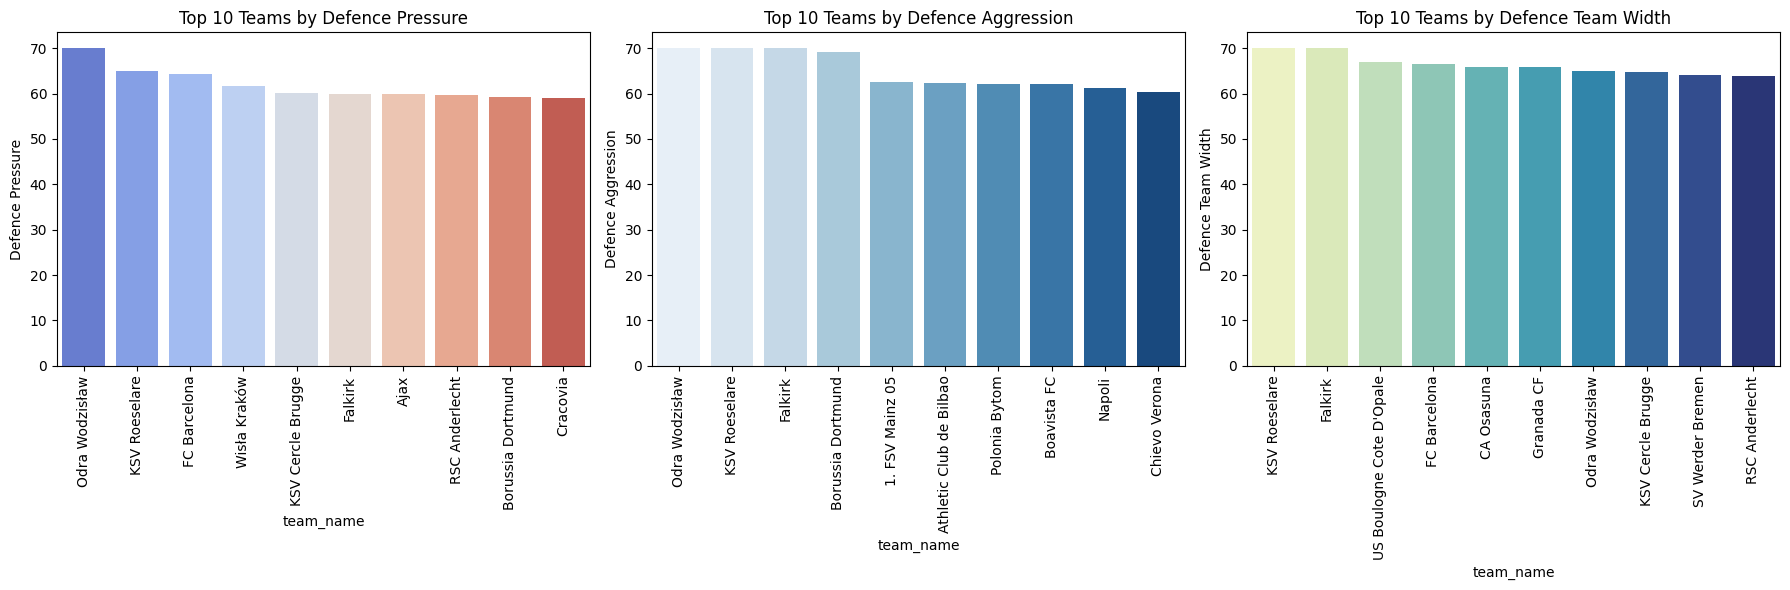

In [124]:
# Merge team_stats and team_data to create team_data_final
team_data_final = pd.merge(team_data, team_stats[['team_api_id', 'win_rate']], on='team_api_id', how='left')

# Ensure 'team_name' is in team_data_final (it might be missing after merges)
if 'team_name' not in team_data_final.columns:
    # If 'team_long_name' is available, rename it to 'team_name'
    if 'team_long_name' in team_data_final.columns:
        team_data_final = team_data_final.rename(columns={'team_long_name': 'team_name'})
    else:
        # If 'team_long_name' is also missing, merge again to get 'team_name'
        team_data_final = pd.merge(team_data_final, team[['team_api_id', 'team_long_name']], on='team_api_id', how='left')
        team_data_final = team_data_final.rename(columns={'team_long_name': 'team_name'})

# Top 10 teams by average defensive pressure
top_teams_by_defencePressure = team_data_final[['team_name', 'defencePressure']].groupby('team_name').mean().sort_values('defencePressure', ascending=False).head(10)
print(top_teams_by_defencePressure)

# Top 10 teams by average defensive team width
top_teams_by_defenceTeamWidth = team_data_final[['team_name', 'defenceTeamWidth']].groupby('team_name').mean().sort_values('defenceTeamWidth', ascending=False).head(10)
print(top_teams_by_defenceTeamWidth)

# Top 10 teams by average defenceAggression #This line has been added
top_teams_by_defenceAggression = team_data_final[['team_name', 'defenceAggression']].groupby('team_name').mean().sort_values('defenceAggression', ascending=False).head(10)
print(top_teams_by_defenceAggression)


# Create subplots to plot all 3 defensive metrics side by side
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Plot top 10 teams by defencePressure
sns.barplot(x=top_teams_by_defencePressure.index, y=top_teams_by_defencePressure['defencePressure'], ax=ax[0], palette='coolwarm')
ax[0].set_title('Top 10 Teams by Defence Pressure')
ax[0].set_ylabel('Defence Pressure')
ax[0].tick_params(axis='x', rotation=90)

# Plot top 10 teams by defenceAggression
sns.barplot(x=top_teams_by_defenceAggression.index, y=top_teams_by_defenceAggression['defenceAggression'], ax=ax[1], palette='Blues')
ax[1].set_title('Top 10 Teams by Defence Aggression')
ax[1].set_ylabel('Defence Aggression')
ax[1].tick_params(axis='x', rotation=90)

# Plot top 10 teams by defenceTeamWidth
sns.barplot(x=top_teams_by_defenceTeamWidth.index, y=top_teams_by_defenceTeamWidth['defenceTeamWidth'], ax=ax[2], palette='YlGnBu')
ax[2].set_title('Top 10 Teams by Defence Team Width')
ax[2].set_ylabel('Defence Team Width')
ax[2].tick_params(axis='x', rotation=90)

# Adjust layout and show the plot
plt.tight_layout()
# Save the figure
plt.savefig('top_10_teams_defensive_metrics.png', bbox_inches='tight')

plt.show()

##Outliers

In [31]:
from scipy import stats
import pandas as pd

# Load the filtered_data DataFrame
filtered_data = pd.read_csv('filtered_data.csv', low_memory=False) #add low_memory=False

filtered_data['total_goals'] = filtered_data['home_team_goal'] + filtered_data['away_team_goal']

# Ensure numerical data types for relevant columns
numerical_cols = ['home_team_goal', 'away_team_goal', 'total_goals']  # Add other relevant columns
filtered_data[numerical_cols] = filtered_data[numerical_cols].apply(pd.to_numeric, errors='coerce')

# Calculate Z-scores
z_scores = stats.zscore(filtered_data['total_goals'])

# Filter for outliers
outliers = filtered_data[abs(z_scores) > 2]
print(outliers)

Empty DataFrame
Columns: [country_id, league_id, season, stage, date, match_api_id, home_team_api_id, away_team_api_id, home_team_goal, away_team_goal, goal, shoton, shotoff, foulcommit, card, cross, corner, possession, total_goals]
Index: []


##Performance HomeTeam vs AwayTeam

In [32]:
from scipy.stats import ttest_ind

# Read the CSV file
df = pd.read_csv('preprocessed_df.csv')

# Extract the home and away team goals
home_goals = df['home_team_goal']
away_goals = df['away_team_goal']

# Perform the t-test
t_stat, p_value = ttest_ind(home_goals, away_goals)
print(f"T-test result: t-statistic = {t_stat}, p-value = {p_value}")

T-test result: t-statistic = 4.886502314319021, p-value = 1.3209786288462601e-06
